# Jupyter Experiment for i523

#### Experiment description: I will follow a tutorial that describes how to use logistic regression. The goal of my project is to classify samples as having a low or high probability of readmission to a hospital within 30 days. I intend on using logistic regression as one of my alorithms, so this experiment gives me the opportunity to learn how to use the algorithm

#### The tutorial can be found here: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

#### In addition to running the code provided in the tutorial, i will annotate the code to describe what the code is doing in my own words

In [3]:
# import pandas and numpy, libraries used for handling and managing data in arrays and DataFrams
import pandas as pd
import numpy as np

# import scikit-learn, library used for preprocessing data and running machine learning algorithms
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# import matplotlib and seaborn, libraries used for data visualization
import matplotlib.pyplot as plt
plt.rc('font', size = 14)
import seaborn as sns
sns.set(style = 'white')
sns.set(style = 'whitegrid', color_codes = True)

In [8]:
# tutorial suggests downloading the CSV but it is also possible to access it directly with the URL
url = 'https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv'

# use pandas function 'read_csv' to read CSV through URL
df = pd.read_csv(url)

# the dataset pertains to a bank's direct marketing campaign. the dependent variable is whether
# or not the person contacted subscribed to a term deposit

In [7]:
df[:5]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [9]:
# 41,118 samples with 20 features and 1 response. As for the response, 1 means the client subscribed
df.shape

(41188, 21)

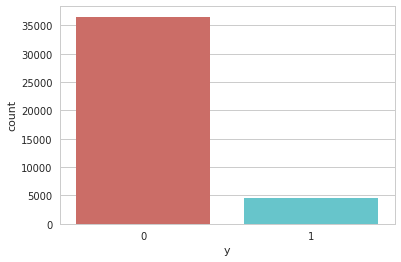

In [12]:
# plot illustrating # of no's and yes's
sns.countplot(x = 'y', data = df, palette = 'hls')
plt.show()

In [15]:
# check for nulls in each column
df.isnull().sum() # no null data

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

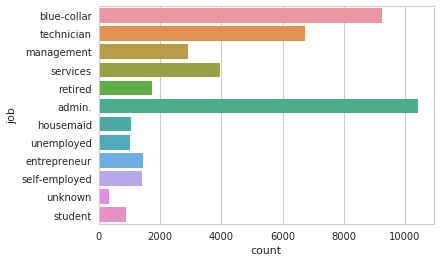

In [19]:
# visualize counts of job classification
sns.countplot(y = 'job', data = df)
plt.show()

# one thing I observed is that this chart puts the variable on the x axis through use of the 
# 'y' attribute. the chart above used the 'x' attribute to get vertical bars

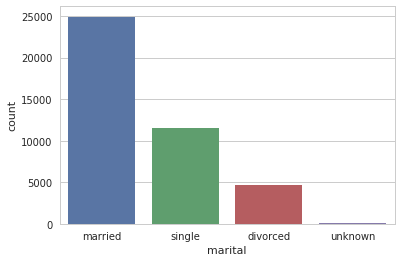

In [20]:
# visualize count of marital status, most are married
sns.countplot(x = 'marital', data = df)
plt.show()

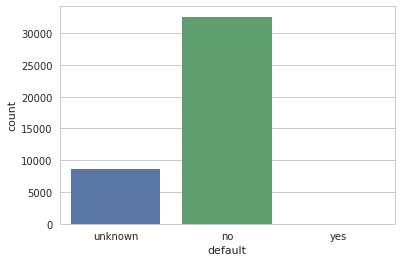

In [27]:
# visualize count of those who are in default, most are not
sns.countplot(x = 'default', data = df)
plt.show()

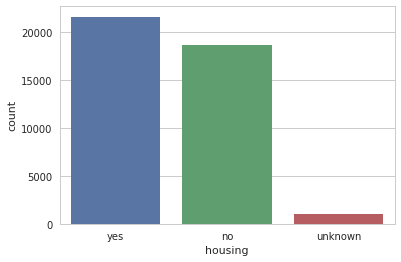

In [25]:
# visualize count of those who report having a housing loan, similar proportions of yes and no
sns.countplot(x = 'housing', data = df)
plt.show()

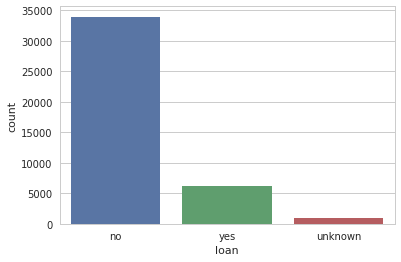

In [23]:
# visualize count of those who report having a personal loan, most do not
sns.countplot(x = 'loan', data = df)
plt.show()

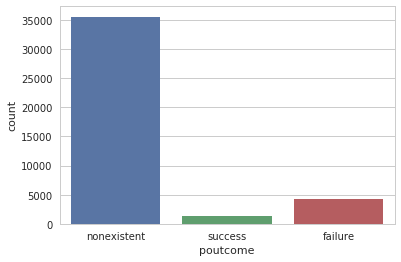

In [24]:
# visualize count of outcome from previous marketing campaign, most have not been contacted before
sns.countplot(x = 'poutcome', data = df)
plt.show()

In [29]:
# the author of this tutorial elects to only use the variables visualized above as
# independent variables. need to drop the extra features
df.drop(df.columns[[0,3,7,8,9,10,11,12,13,15,16,17,18,19]], axis = 1, inplace = True)
df[:5]

,job,marital,default,housing,loan,poutcome,y
0,blue-collar,married,unknown,yes,no,nonexistent,0
1,technician,married,no,no,no,nonexistent,0
2,management,single,no,yes,no,success,1
3,services,married,no,no,no,nonexistent,0
4,retired,married,no,yes,no,success,1


In [37]:
# the categorical variables need to be separated in a way that each level has its own column
# and an indicator of yes or no (1or 0)
df2 = pd.get_dummies(df, columns = ['job','marital','default','housing','loan','poutcome'])

In [38]:
# each level now has its own column.
df2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [39]:
# drop the 'unknown' columns
df2.drop(df2.columns[[12,16,18,21,24]], axis = 1, inplace = True)
df2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

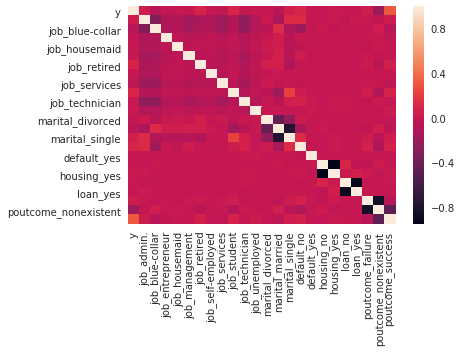

In [43]:
# make heatmap visualizing correlation coefficient of each pair of variables. 
# we hope to see that the independent variables are independent of each other, as in not 
# highly correlated. One of the reasons for this is that if two variables are highly
# correlated then the variables may be redundant if both are included in the model.
# including a variable that is highly correlated with another will not add much new information
# to the model, but will add complexity and computation time
sns.heatmap(df2.corr())
plt.show()

# the tutorial simply says everything looks good, but I wonder about the high negative 
# correlation between a few of the variables that represent opposite (i.e. single vs married
# or loan yes vs loan no)

In [44]:
df2.corr()
# the actual correlation coefficients behind the heatmap

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
y,1.000000,0.031426,-0.074423,-0.016644,-0.006505,-0.000419,0.092221,-0.004663,-0.032301,0.093955,...,0.054133,0.099344,-0.003041,-0.011085,0.011743,0.005123,-0.004466,0.031799,-0.193507,0.316269
job_admin.,0.031426,1.000000,-0.313313,-0.111417,-0.094595,-0.160892,-0.121502,-0.110021,-0.190063,-0.085748,...,0.117787,0.121336,-0.004967,-0.008529,0.011128,-0.015485,0.020088,0.002771,-0.015560,0.025069
job_blue-collar,-0.074423,-0.313313,1.000000,-0.103050,-0.087492,-0.148810,-0.112378,-0.101759,-0.175791,-0.079308,...,-0.100192,-0.176579,-0.004594,0.014033,-0.016031,0.003089,-0.006127,-0.013254,0.043843,-0.061403
job_entrepreneur,-0.016644,-0.111417,-0.103050,1.000000,-0.031113,-0.052918,-0.039962,-0.036186,-0.062513,-0.028203,...,-0.060245,0.000974,-0.001634,-0.004567,0.004287,0.004789,-0.005449,0.001595,0.007598,-0.017238
job_housemaid,-0.006505,-0.094595,-0.087492,-0.031113,1.000000,-0.044929,-0.033929,-0.030723,-0.053075,-0.023945,...,-0.060971,-0.036846,-0.001387,0.003620,-0.004689,0.001319,-0.002905,-0.017853,0.014629,0.002276
job_management,-0.000419,-0.160892,-0.148810,-0.052918,-0.044929,1.000000,-0.057708,-0.052255,-0.090272,-0.040726,...,-0.067364,0.035478,-0.002359,0.007787,-0.007896,0.000953,-0.001201,0.009056,-0.007343,-0.001302
job_retired,0.092221,-0.121502,-0.112378,-0.039962,-0.033929,-0.057708,1.000000,-0.039462,-0.068171,-0.030756,...,-0.105345,-0.010113,-0.001782,0.001549,-0.002189,0.005822,-0.007076,0.020917,-0.054113,0.068061
job_self-employed,-0.004663,-0.110021,-0.101759,-0.036186,-0.030723,-0.052255,-0.039462,1.000000,-0.061730,-0.027849,...,-0.005950,0.004812,-0.001613,-0.000392,-0.001166,0.005143,-0.007624,-0.000741,0.007385,-0.012871
job_services,-0.032301,-0.190063,-0.175791,-0.062513,-0.053075,-0.090272,-0.068171,-0.061730,1.000000,-0.048110,...,0.004078,-0.017667,-0.002787,0.003889,-0.004799,-0.000978,-0.000247,0.010347,0.005760,-0.028558
job_student,0.093955,-0.085748,-0.079308,-0.028203,-0.023945,-0.040726,-0.030756,-0.027849,-0.048110,1.000000,...,0.216639,0.032601,-0.001257,-0.004941,0.004261,-0.004971,0.004350,0.040214,-0.079189,0.083321


In [ ]:
# split the data into training and test sets

# the slice translates to 'give me all rows, including the columns from the first index forward'
X = df2.iloc[:, 1:]
`
# the slice transplates to 'give me all rows, only the first column'
y = df2.iloc[:,0]

In [47]:
# research train_test_split
train_test_split?

In [48]:
# train_test_split returns four variables which include the training independent and response
# variables along with the test independent and response variables
# the samples are randomly distributed, but the function allows for the utilization of the 
# random_state variable which allows for reproducability of examples so that the split is the 
# same for those who try to recreate an example.
# there is also a test size variable not shown here which dictates what proportion of the original
# data is set aside as test data
X_train, X_test, y_train, y_test = train_test_split(X
                                                   ,y
                                                   ,random_state = 0)

In [50]:
X_train.shape

(30891, 23)

In [51]:
X_test.shape

(10297, 23)

In [53]:
# instantiate classifier and fit with training data
clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
# feed X_test into classifier to predict success/failure, store result in y_pred
y_pred = clf.predict(X_test)

# create confusion matrix to show TP, TN, FN, FP counts
from sklearn.metrics import confusion_matrix
confMat = confusion_matrix(y_test, y_pred)
print(confMat)

# storing confusion matrix values as separate variables to be inserted into string for readability
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print('{} true negatives'.format(tn))
print('{} false positives'.format(fp))
print('{} false negatives'.format(fn))
print('{} true positives'.format(tp))



[[9046  110]
 [ 912  229]]
9046 true negatives
110 false positives
912 false negatives
229 true positives


In [64]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [65]:
# run classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95      9156
          1       0.68      0.20      0.31      1141

avg / total       0.88      0.90      0.88     10297



In [ ]:
# the f1-score is also known as the F-score. it is the weighted average of the precision 
# and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative
# contribution of precision and recall to the F1 score are equal. 

2 * (0.91 * 0.99) / (0.91 + 0.99)

In [72]:
# the support is the count of each class
y_test.sum()

1141